In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(r'C:\Users\nadin\OneDrive\Documents\Machine Learning Project\train_dump.csv')

In [3]:
columns_to_convert = df_train.columns[8:-1]
df_train[columns_to_convert] = df_train[columns_to_convert].astype('int8')

In [4]:
df_test = pd.read_csv(r'C:\Users\nadin\OneDrive\Documents\Machine Learning Project\test_dump.csv')

In [5]:
df_test[columns_to_convert] = df_test[columns_to_convert].astype('int8')

In [6]:
df_train = df_train.iloc[:, 1:]
df_test = df_test.iloc[:, 1:]

In [7]:
x_train = df_train[df_train.columns[:-1]].to_numpy()
y_train = df_train['label'].to_numpy()

x_test = df_test[df_test.columns[:-1]].to_numpy()
y_test = df_test['label'].to_numpy()

In [8]:
kf = KFold(n_splits=5)

f1s = []
accuracies = []
precisions = []
recalls = []
roc_aucs = []

In [9]:
model = DecisionTreeClassifier()

fold = 1
for train, valid in kf.split(x_train, y_train):
    print(f"##### FOLD: {fold} #####")

    # Fit the model
    model.fit(x_train[train], y_train[train])

    # Predict on the test set
    predictions = model.predict(x_train[valid])

    # Evaluate the model
    precision = precision_score(y_true=y_train[valid], y_pred=predictions, zero_division=0)
    recall = recall_score(y_true=y_train[valid], y_pred=predictions, zero_division=0)
    accuracy = accuracy_score(y_true=y_train[valid], y_pred=predictions)
    f1 = f1_score(y_true=y_train[valid], y_pred=predictions, zero_division=0)

    # Store the result
    f1s.append(f1)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Print the scores for each fold
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"Accuracy = {accuracy}")
    print(f"F1 score = {f1}\n")

    fold += 1

print("\nMean Scores: ")
print(f"Mean F1 score = {np.mean(f1s)}")
print(f"Mean Accuracy = {np.mean(accuracies)}")
print(f"Mean Precision = {np.mean(precisions)}")
print(f"Mean Recall = {np.mean(recalls)}")

##### FOLD: 1 #####
Precision = 0.9991048211773733
Recall = 0.9991857475988081
Accuracy = 0.9983291666666667
F1 score = 0.9991452827494186

##### FOLD: 2 #####
Precision = 0.9992620303975225
Recall = 0.9990106019122676
Accuracy = 0.9983125
F1 score = 0.9991363003371627

##### FOLD: 3 #####
Precision = 0.9991854836990127
Recall = 0.9990960105067458
Accuracy = 0.9983208333333333
F1 score = 0.9991407450997951

##### FOLD: 4 #####
Precision = 0.9992750254807221
Recall = 0.9992238905259208
Accuracy = 0.9985333333333334
F1 score = 0.9992494573491345

##### FOLD: 5 #####
Precision = 0.9991520115224163
Recall = 0.9991605268652709
Accuracy = 0.99835
F1 score = 0.9991562691757006


Mean Scores: 
Mean F1 score = 0.9991656109422422
Mean Accuracy = 0.9983691666666668
Mean Precision = 0.9991958744554094
Mean Recall = 0.9991353554818027


In [10]:
y_pred = model.predict(x_test)

In [11]:
classification = classification_report(y_test, y_pred, zero_division=0)

print("\nClassification Report:\n", classification)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      8062
           1       1.00      1.00      1.00    353872

    accuracy                           1.00    361934
   macro avg       0.98      0.99      0.98    361934
weighted avg       1.00      1.00      1.00    361934



[Text(0.7930378443247993, 0.9924242424242424, 'x[6] <= 1.527\ngini = 0.045\nsamples = 960000\nvalue = [21924, 938076]'),
 Text(0.7918643136304966, 0.9772727272727273, 'x[6] <= -1.151\ngini = 0.002\nsamples = 939194\nvalue = [1118, 938076]'),
 Text(0.7906907829361939, 0.9621212121212122, 'x[4] <= 0.5\ngini = 0.045\nsamples = 48201\nvalue = [1118, 47083]'),
 Text(0.6168205307040455, 0.946969696969697, 'x[5] <= 0.5\ngini = 0.174\nsamples = 10299\nvalue = [990, 9309]'),
 Text(0.5031310866127198, 0.9318181818181818, 'x[553] <= 0.5\ngini = 0.432\nsamples = 2795\nvalue = [881.0, 1914.0]'),
 Text(0.5019575559184171, 0.9166666666666666, 'x[1163] <= 0.5\ngini = 0.441\nsamples = 2689\nvalue = [881, 1808]'),
 Text(0.4271448310432569, 0.9015151515151515, 'x[523] <= 0.5\ngini = 0.455\nsamples = 2430\nvalue = [849, 1581]'),
 Text(0.31389883281632036, 0.8863636363636364, 'x[2] <= 1.574\ngini = 0.448\nsamples = 2366\nvalue = [803.0, 1563.0]'),
 Text(0.18114747118066757, 0.8712121212121212, 'x[848] <= 0

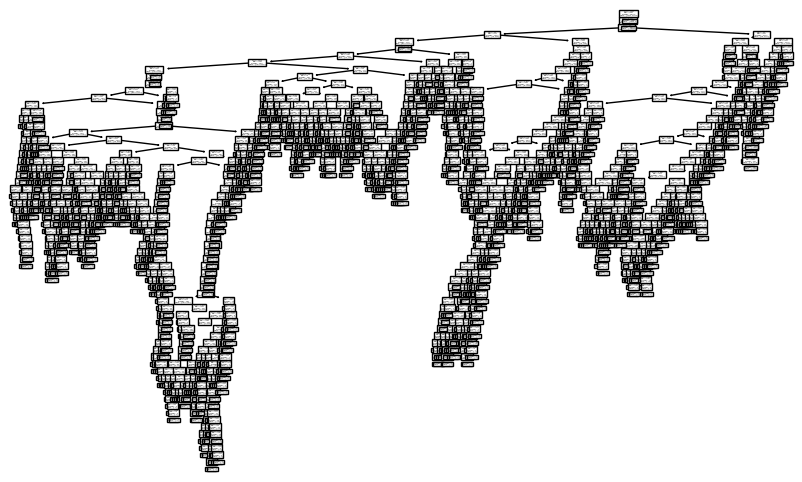

In [18]:
plt.figure(figsize=(10, 6))
plot_tree(model)